In [1]:
# import all important libraries
import pandas as pd
import numpy as np
# for EDA -> Visualize Graph and Stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
#data load
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
type(np.NaN)

float

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.select_dtypes('object').columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [7]:
for col in df.select_dtypes('object').columns:
    print(f'{col} = {df[col].unique()}')

Sex = ['M' 'F']
ChestPainType = ['ATA' 'NAP' 'ASY' 'TA']
RestingECG = ['Normal' 'ST' 'LVH']
ExerciseAngina = ['N' 'Y']
ST_Slope = ['Up' 'Flat' 'Down']


In [8]:
#if 2 ,3 ,4 category label encoder and more than 4 onehot

# LabelEncoding :
  -- It is preprocessing operation 
  -- It is used for converting text categorical into an int value(sequentially_)
  -- It works on ordinal categorical feature only (good for ordinal)

In [9]:
label_encode=LabelEncoder()
label_encode

LabelEncoder()

In [10]:
for col in df.select_dtypes('object').columns:
    df[col]=label_encode.fit_transform(df[col])

In [11]:
df #here order is mattered - ordinal
# rank , order not matters - onehot encoder

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [13]:
# principle? compose? 12 into 7 colmn -----will learn later

In [14]:
#EDA :


In [15]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [16]:
numerical_col=['Age','Cholesterol','MaxHR','Oldpeak']
categorical_col=['Sex', 'ChestPainType', 'FastingBS','RestingECG', 'ExerciseAngina', 'ST_Slope','HeartDisease']

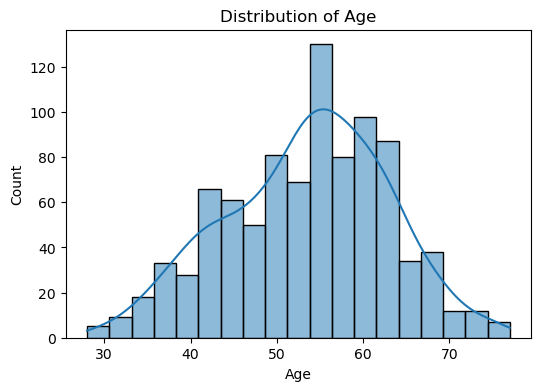

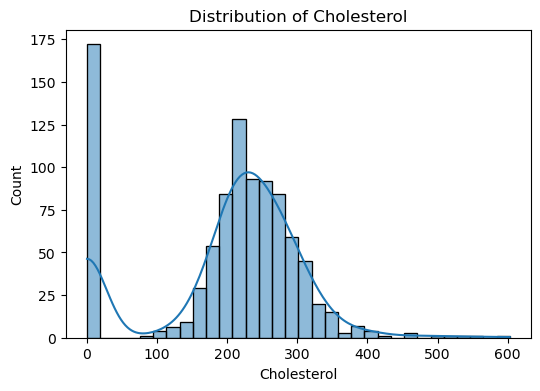

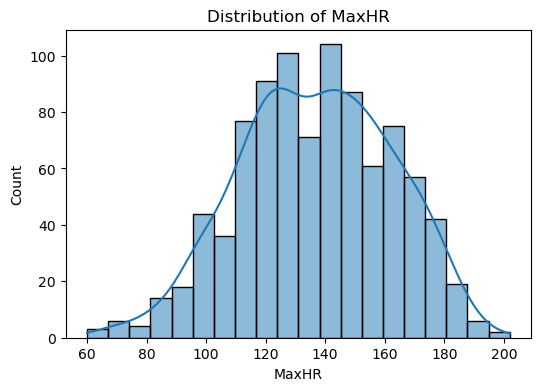

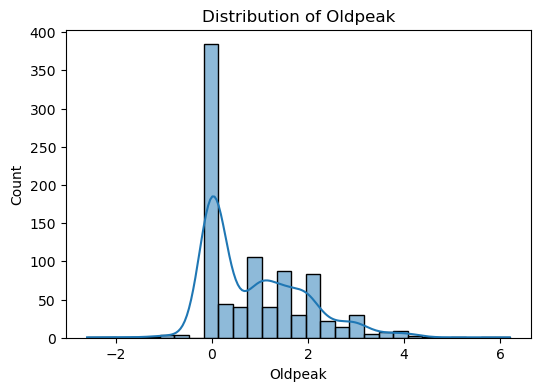

In [17]:
# EDA :::::
## Univariate analysis
for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')

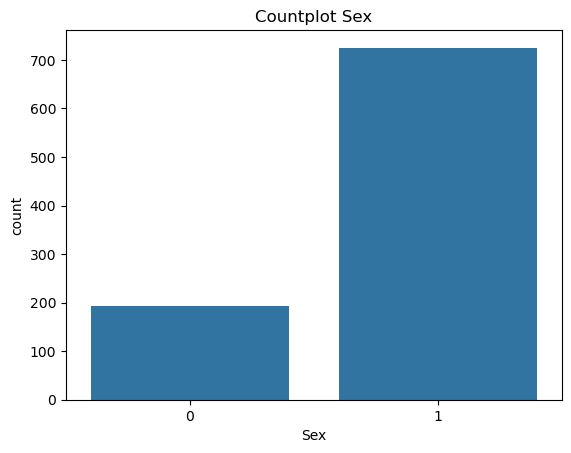

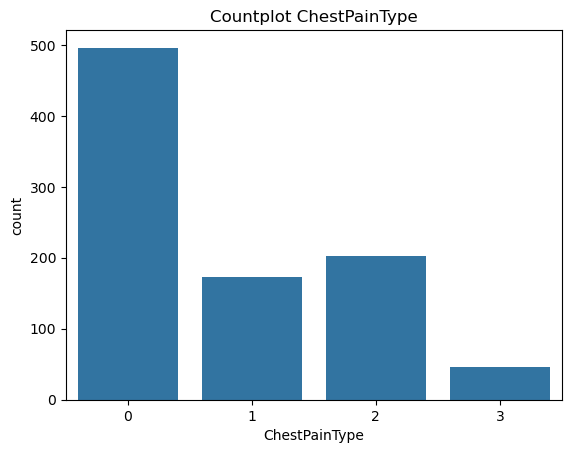

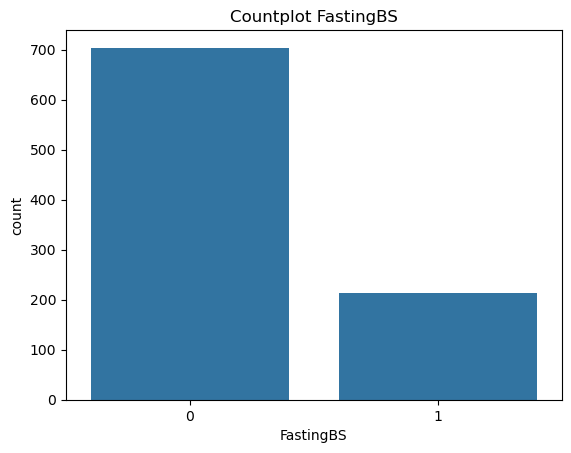

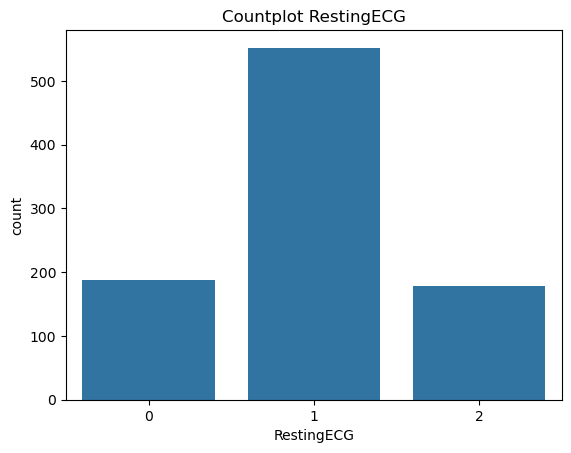

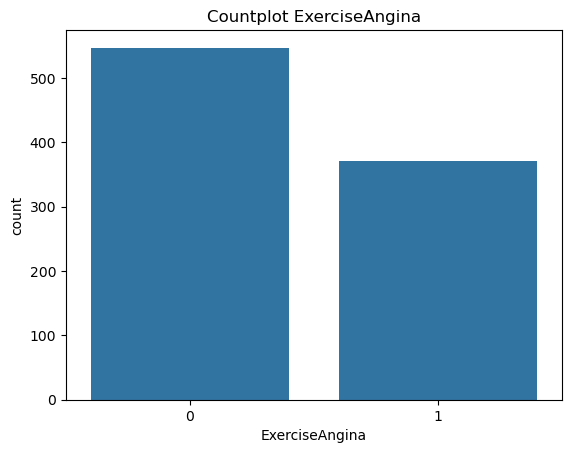

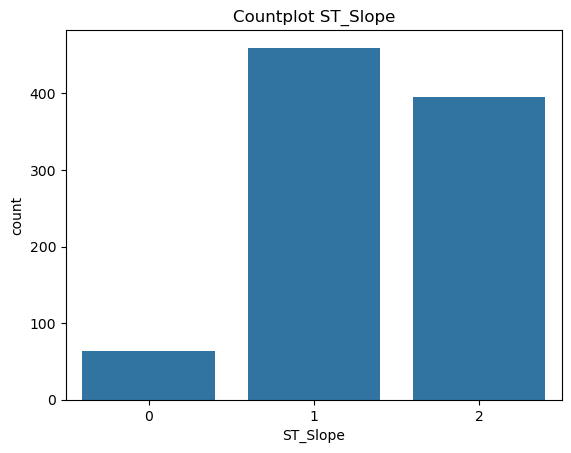

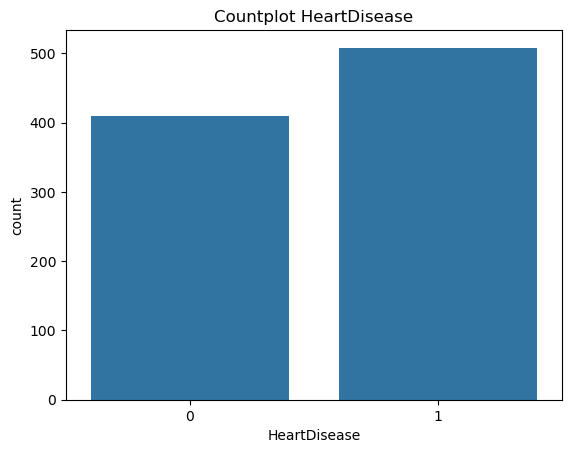

In [18]:
for col in categorical_col:
    sns.countplot(x=col,data=df)
    plt.title(f'Countplot {col}')
    plt.show()

In [19]:
#pipeline????????????????????????????????????????????/

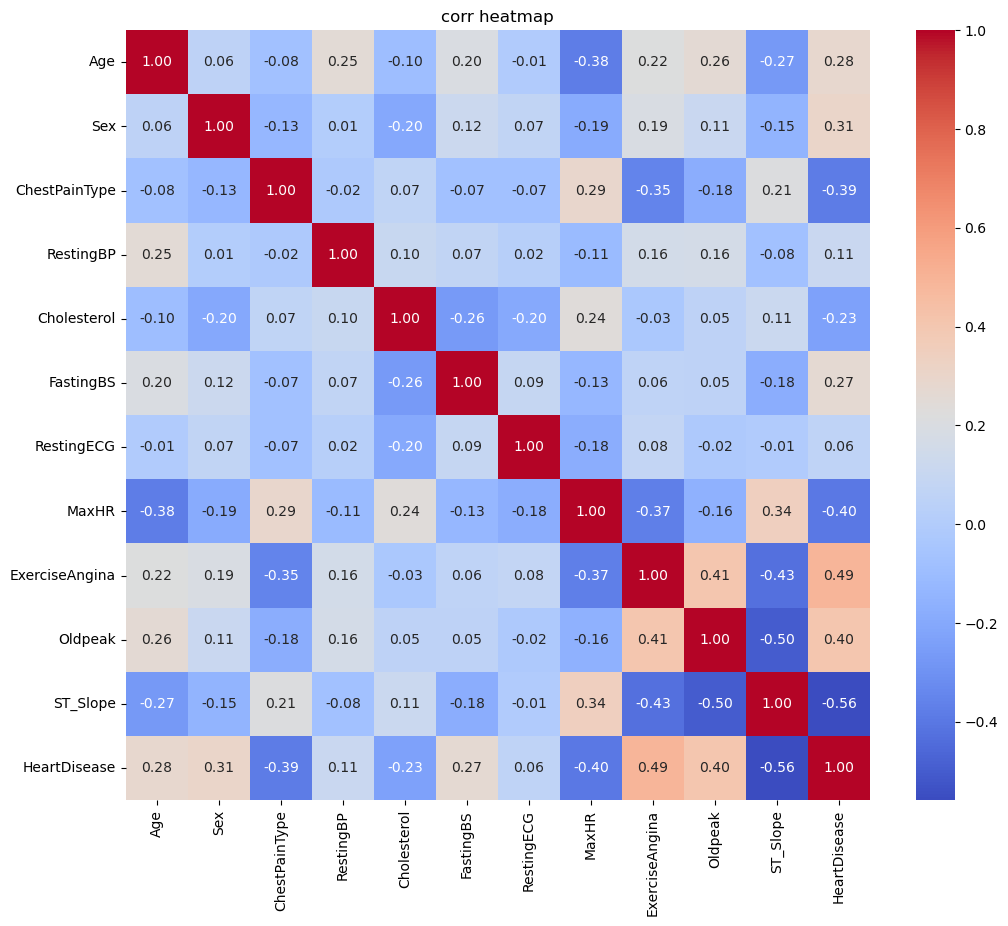

In [20]:
# bivariate anlaysis
# scatter boxplot
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('corr heatmap')
plt.show()

In [21]:
# input data not correlated to output or dependent

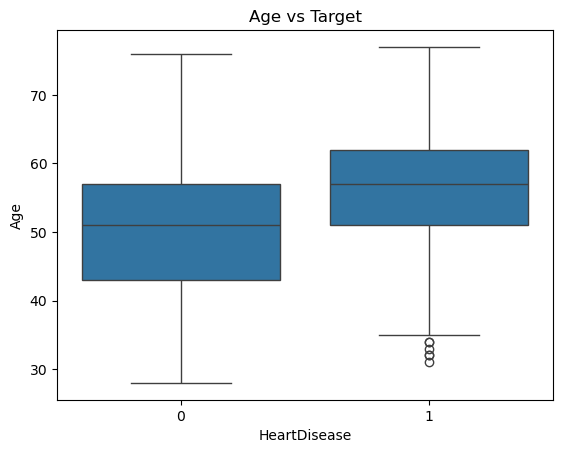

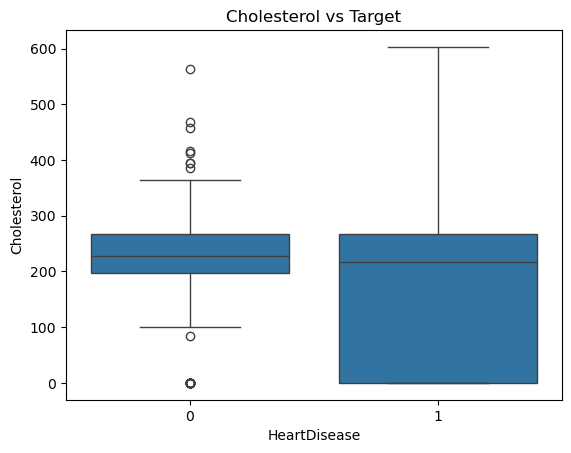

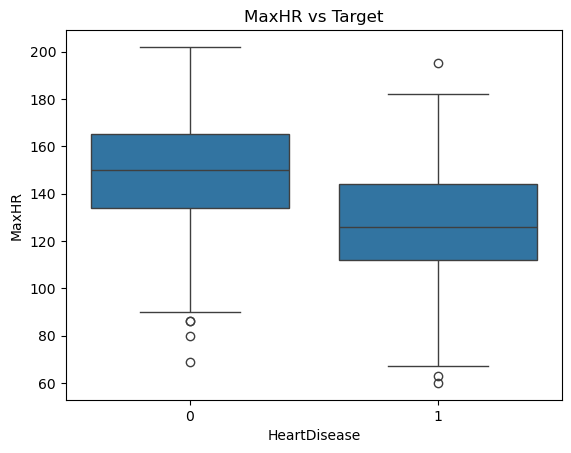

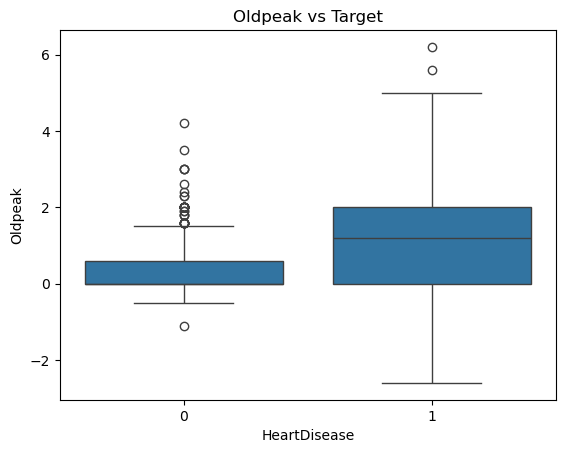

In [22]:
# boxplot:
for col in numerical_col:
    sns.boxplot(x='HeartDisease',y=col,data=df)
    plt.title(f'{col} vs Target')
    plt.show()

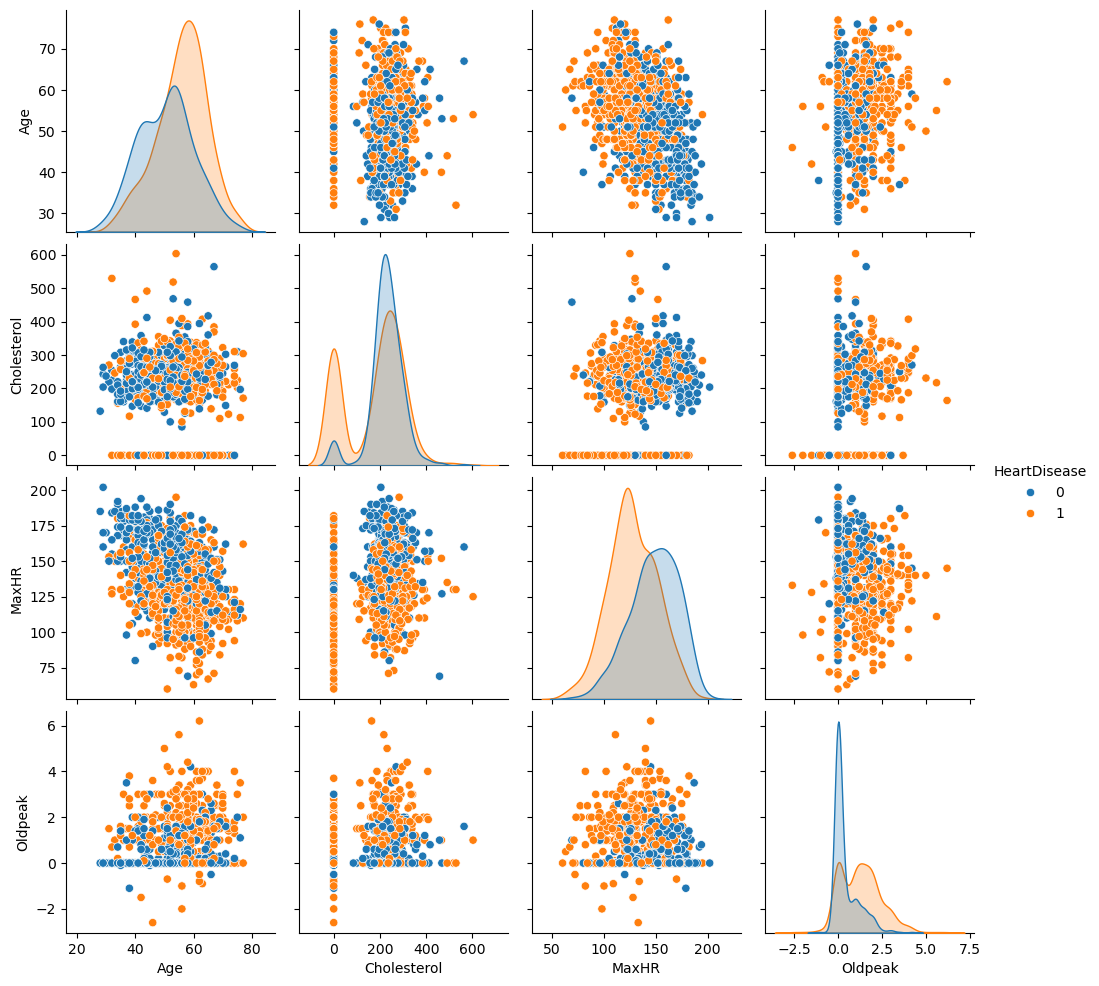

In [23]:
# multivariate analysis
sns.pairplot(df,hue='HeartDisease',vars=numerical_col)
plt.show()

In [24]:
# feature separation
x=df.drop(['HeartDisease'],axis=1)
y=df.HeartDisease

In [25]:
# train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43,stratify=y)

In [26]:
# feature scaling
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43,stratify=y)

In [27]:
x_train.sample(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
754,57,1,0,132,207,0,1,168,1,0.0,2
579,69,1,0,145,289,1,2,110,1,1.8,1


In [28]:
#standard scalar


# feature scaling
    - 1. Standerscaler :
            
    - 2. MinMaxScaler
    - 3. Robustscaler

if outliers - robust scalar = IQR = q3 - q1

In [29]:
x_train.sample(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
83,52,1,1,160,196,0,1,165,0,0.0,2
258,51,0,2,150,200,0,1,120,0,0.5,2


In [30]:
from sklearn.preprocessing import StandardScaler
data=np.array([[46],[30],[50],[6000],[-908]])
scaler=StandardScaler()
d=scaler.fit_transform(data)
d

array([[-0.39818419],
       [-0.40457046],
       [-0.39658762],
       [ 1.97830804],
       [-0.77896577]])

In [31]:
np.std(d)

1.0

In [32]:
np.mean(df['Age']),np.std(df['Age']) ### for 40 age

(53.510893246187365, 9.427477516153491)

In [33]:
(40-53.510893246187365)/ 9.427

-1.4332123948432551

In [34]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [35]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=np.array([[46],[30],[50],[6000],[-908]])
scaler.fit_transform(data)

array([[0.13810075],
       [0.1357846 ],
       [0.13867979],
       [1.        ],
       [0.        ]])

In [36]:
# Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit_transform(data)

array([[ 0.000e+00],
       [-8.000e-01],
       [ 2.000e-01],
       [ 2.977e+02],
       [-4.770e+01]])

In [37]:
scaler=StandardScaler()
scaler

StandardScaler()

In [38]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [39]:
x_test_scaled

array([[ 0.69627209,  0.45883147, -0.84161988, ..., -0.84830783,
         0.18553213, -0.73185265],
       [ 1.5745176 , -2.17944947,  1.23701177, ..., -0.84830783,
        -0.82148592,  1.04000114],
       [ 0.91583347,  0.45883147, -0.84161988, ...,  1.17881737,
         3.20658628, -2.50370645],
       ...,
       [-1.389561  ,  0.45883147, -0.84161988, ..., -0.84830783,
        -0.82148592, -0.73185265],
       [-0.18197342,  0.45883147,  1.23701177, ...,  1.17881737,
        -0.82148592,  1.04000114],
       [-0.07219274,  0.45883147, -0.84161988, ..., -0.84830783,
         0.18553213,  1.04000114]])

 # MODEL TRAINING >>> KNN

In [54]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
# Evaluation of this model
y_pred_test=knn.predict(x_test_scaled)
y_pred_test

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [56]:
y_test

911    1
751    0
521    1
268    1
503    0
      ..
519    1
451    1
457    1
832    0
709    1
Name: HeartDisease, Length: 184, dtype: int64

In [57]:
y_pred_test=knn.predict(x_test_scaled)
print('Accuracy_model',accuracy_score(y_test,y_pred_test))
print('\n CLassification Report \n', classification_report(y_test,y_pred_test))
print('\n Confusion Matrix \n',confusion_matrix(y_test,y_pred_test))

Accuracy_model 0.8586956521739131

 CLassification Report 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.88      0.86      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184


 Confusion Matrix 
 [[70 12]
 [14 88]]


In [58]:
y_pred_train=knn.predict(x_train_scaled)
print('Accuracy_model',accuracy_score(y_train,y_pred_train))
print('\n CLassification Report \n', classification_report(y_train,y_pred_train))
print('\n Confusion Matrix \n',confusion_matrix(y_train,y_pred_train))

Accuracy_model 0.9087193460490464

 CLassification Report 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       328
           1       0.90      0.93      0.92       406

    accuracy                           0.91       734
   macro avg       0.91      0.91      0.91       734
weighted avg       0.91      0.91      0.91       734


 Confusion Matrix 
 [[288  40]
 [ 27 379]]


In [45]:
# cross validation
from sklearn.model_selection import cross_val_score
k_range=range(1,10,2)
cv_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_test_scaled,y_test,cv=5,scoring='neg_mean_squared_error')
    cv_score.append(np.abs(scores.mean()))

In [46]:
cv_score

[0.1250750750750751,
 0.1304804804804805,
 0.13573573573573575,
 0.14669669669669672,
 0.15735735735735737]

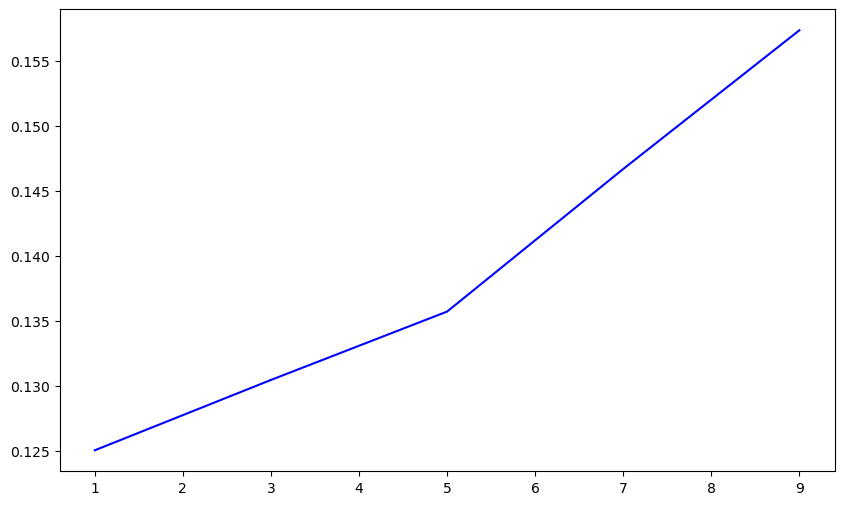

In [48]:
plt.figure(figsize=(10,6))
plt.plot(k_range,cv_score,color="blue")